# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values={'IBUs': ['Does not apply']})


df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
df.groupby('Brewery')['Beer'].nunique().sort_values(ascending=False).head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           41
Sun King Brewing Company      38
Cigar City Brewing Company    24
Sixpoint Craft Ales           24
Great Crescent Brewery        20
21st Amendment Brewery        19
SanTan Brewing Company        19
Upslope Brewing Company       18
Great River Brewery           18
Name: Beer, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
# Thought at first you meant mean but then I realised you meant mode. 

df['ABV'].mode()

0    5.00%
Name: ABV, dtype: object

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df['ABV'].head()

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
df['ABV'] = df['ABV'].str.replace("%", "").astype(float)

In [9]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [10]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [11]:
df['ABV'].mean()

np.float64(5.977342419080068)

In [12]:
df.ABV.median()

np.float64(5.6)

In [13]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

<Axes: >

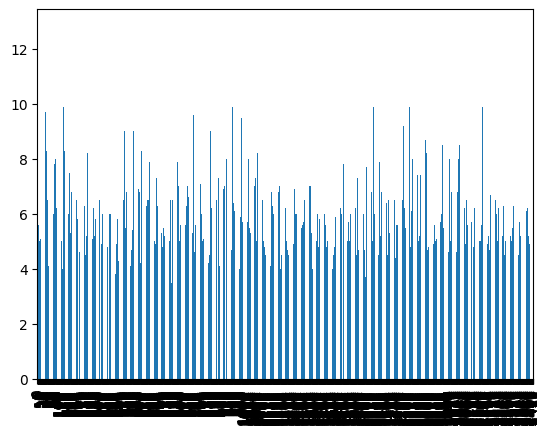

In [14]:
df.ABV.plot(kind='bar')

<Axes: >

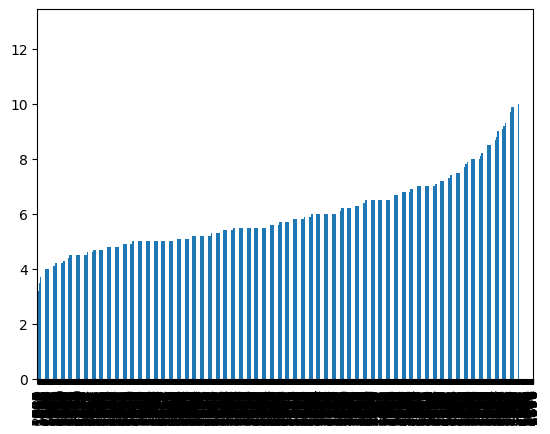

In [15]:
df.ABV.sort_values().plot(kind='bar')

<Axes: xlabel='Beer'>

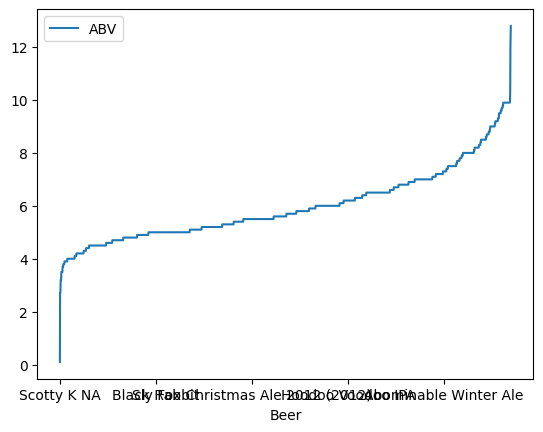

In [16]:
df.sort_values('ABV').plot(x='Beer', y='ABV', kind='line')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [17]:
df.ABV.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2411    False
2412    False
2413    False
2414    False
2415    False
Name: ABV, Length: 2416, dtype: bool

In [18]:
df.ABV.isnull().sum()

np.int64(68)

In [19]:
df.ABV.isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

In [20]:
# We're missing ABV for 68 of the beers

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [21]:
df['Location'].value_counts(ascending=False).head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [23]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


In [24]:
df[df['Location'] == 'Brooklyn, NY'].Beer.tolist()

['4Beans',
 'Jammer',
 'Abigale',
 'Nomader Weiss',
 'Rad',
 'Molotov Lite',
 'Bengali',
 'Sensi Harvest',
 'Hi-Res',
 'KelSo Nut Brown Lager',
 'Global Warmer',
 'Autumnation (2013)',
 'KelSo India Pale Ale',
 'The Crisp',
 'Sweet Action',
 'Righteous Ale',
 'Bengali Tiger',
 'KelSo Pilsner',
 'Hipster Ale (Two Roads Brewing)',
 'Bikini Beer',
 'East India Pale Ale',
 '3Beans',
 'Brownstone',
 'Brooklyn Summer Ale',
 'Hipster Ale (Westbrook Brewing)',
 'Apollo',
 'Harbinger',
 'Resin',
 'East India Pale Ale',
 'Diesel',
 'Autumnation (2011-12) (2011)',
 'The Crisp (2011)',
 'Sweet Action (2011)',
 'Righteous Ale (2011)',
 'Bengali Tiger (2011)',
 'Brooklyn Summer Ale (2011)',
 'Brooklyn Lager (16 oz.)',
 'Brooklyn Lager (12 oz.)']

## What brewery in Brooklyn puts out the most different cans of beer?

In [25]:
# df[df['Location'] == 'Brooklyn, NY'].groupby('Brewery').sort_values(ascending=False).head(1)

df[df['Location'] == 'Brooklyn, NY'].groupby('Brewery')['Beer'].nunique().sort_values(ascending=False).head(1)

Brewery
Sixpoint Craft Ales    24
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [26]:
df[df['Brewery'] == 'Sixpoint Craft Ales'].groupby('Style')['Beer'].nunique().sort_values(ascending=False).head()

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Name: Beer, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [27]:
df[df['Location'].str.endswith('NY', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


In [28]:
# df[df['Location'].str.endswith('NY', na=False)].groupby['Brewery'].tolist()

df[df['Location'].str.endswith('NY', na=False)]['Brewery'].unique().tolist()

['Sixpoint Craft Ales',
 'Evil Twin Brewing',
 'Chatham Brewing',
 'Newburgh Brewing Company',
 'Southampton Publick House',
 'Montauk Brewing Company',
 'Matt Brewing Company',
 'The Bronx Brewery',
 'KelSo Beer Company',
 'Brooklyn Brewery',
 'The Manhattan Brewing Company',
 'Blue Point Brewing Company',
 'Bomb Beer Company',
 'Dundee Brewing Company',
 'Upstate Brewing Company',
 'Butternuts Beer and Ale']

### Now *count* all of the breweries in New York state

In [29]:
# df[df['Location'].str.endswith('NY', na=False)]['Brewery'].value_counts()

df[df['Location'].str.endswith('NY', na=False)]['Brewery'].nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [30]:
df[df['Style'].str.contains('IPA', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [55]:
df['IBUs'].mean()

TypeError: can only concatenate str (not "int") to str

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [31]:
df['IBUs'].dtype

dtype('float64')

In [32]:
df['IBUs'].mean()

np.float64(42.71316725978647)

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: ylabel='Frequency'>

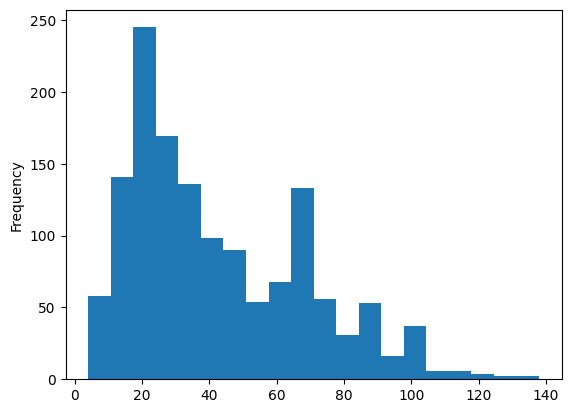

In [33]:
df['IBUs'].plot(kind='hist', bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [34]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [37]:
threshold_high = df['IBUs'].quantile(0.75)

high_ibu_beers = df[df['IBUs'] > threshold]

high_ibu_beers['Beer']

6                Citra Ass Down
7                London Balling
14                  Rico Sauvin
17                 Pile of Face
21                   Excess IPL
                 ...           
2408      Brew Free! or Die IPA
2410    Ten Fidy Imperial Stout
2412         GUBNA Imperial IPA
2414          Gordon Ale (2009)
2415            Dale's Pale Ale
Name: Beer, Length: 346, dtype: object

In [36]:
high_ibu_beers['Beer'].tolist()

['Citra Ass Down',
 'London Balling',
 'Rico Sauvin',
 'Pile of Face',
 'Excess IPL',
 'Hoponius Union',
 'Habitus (2014)',
 'Solis',
 'Habitus',
 'Yeti Imperial Stout',
 "98 Problems (Cuz A Hop Ain't One)",
 'Train Hopper',
 'Csar',
 'Saucy Intruder',
 'The Gadget',
 'Gone A-Rye',
 'Heavy Lifting',
 'Jah Mon',
 'Flying Mouse 4',
 'Citra Ass Down',
 'Soul Doubt',
 'Bimini Twist',
 'Long Leaf',
 'Double Duckpin',
 'Hop A-Peel',
 'Wobble',
 'Hopkick Dropkick',
 'Union Jack',
 'India Pale Ale',
 'Self Starter',
 'Nugget Nectar',
 'Mission IPA',
 'Bay of Bengal Double IPA (2014)',
 'Newport Storm IPA',
 'Clean Shave IPA',
 'Big Star White IPA',
 'Firestarter India Pale Ale',
 'Back Bay IPA',
 '4000 Footer IPA',
 'Unchained #18 Hop Silo',
 'Harness the Winter',
 'Rule G IPA',
 'Yellow Wolf Imperial IPA',
 'Third Eye Enlightened Pale Ale',
 'The Green Room',
 '2014 IPA Cicada Series',
 'Sinister Minister Black IPA',
 'O’Malley’s IPA',
 'Perpetual Darkness',
 'Watershed IPA',
 'Hoodoo Voodoo 

## List all of the beers with IBUs below the 25th percentile

In [39]:
threshold_low = df['IBUs'].quantile(0.25)

low_ibu_beers = df[df['IBUs'] < threshold]

low_ibu_beers['Beer']

0                        Get Together
1                       Maggie's Leap
2                          Wall's End
3                             Pumpion
4                          Stronghold
                    ...              
2405                         CynicAle
2407                     Monk's Blood
2409    Hell or High Watermelon Wheat
2411         Mama's Little Yella Pils
2413                         Old Chub
Name: Beer, Length: 1052, dtype: object

In [40]:
low_ibu_beers['Beer'].tolist()

['Get Together',
 "Maggie's Leap",
 "Wall's End",
 'Pumpion',
 'Stronghold',
 'Parapet ESB',
 '35 K',
 'A Beer',
 'Rules are Rules',
 "Flesh Gourd'n",
 "Sho'nuff",
 'Bloody Show',
 'Coq de la Marche',
 'The Brown Note',
 'House Lager',
 'Leisure Time',
 'Calyptra',
 'Jucundus',
 'Grazias',
 'Claritas',
 'Park',
 'Westfalia',
 'KSA',
 'Villager',
 "Peck's Porter",
 'Dark Star',
 'Sparkle',
 'Nordskye',
 'Hotbox Brown',
 'Gold',
 'Veteran’s Pale Ale (VPA)',
 'Grapefruit IPA',
 'Dirty Bastard',
 'Cafe Leche',
 'Damascene Apricot Sour',
 'Thai.p.a',
 'Pole Barn Stout',
 'Pale',
 "Yoshi's Nectar",
 'Tribute',
 'Tip Off',
 'Blonde Czich',
 'Citrafest',
 'Deduction',
 'Sex Panther',
 'Surfrider',
 'Czech Yo Self',
 'Cow Creek',
 'Vanilla Porter',
 'Galaxy IPA',
 'Gose',
 'Vermont Pilsner',
 'Fist City',
 'Wooden Rooster',
 '4Beans',
 'Easy Jack',
 'Take Two Pils',
 'Lee Hill Series Vol. 2 - Wild Saison',
 'Lee Hill Series Vol. 3 - Barrel Aged Imperial Stout',
 'Moar',
 'Nordic Blonde',
 'Ging

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [45]:
median_IBUs_style = df.groupby('Style')['IBUs'].median().sort_values(ascending=False, na_position='last')
median_IBUs_style

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

<Axes: xlabel='Style'>

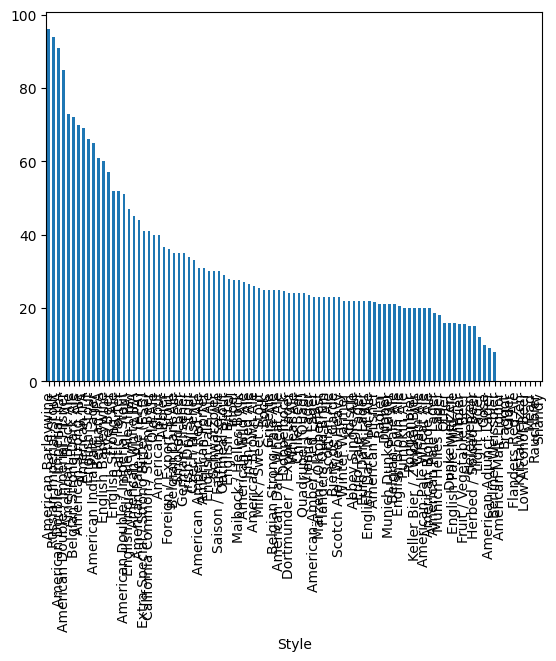

In [49]:
median_IBUs_style.plot(kind='bar')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [54]:
high_ibu_beers['Style'].value_counts().head()

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [55]:
low_ibu_beers['Style'].value_counts().head()

Style
American Pale Ale (APA)     135
American IPA                100
American Amber / Red Ale     70
American Blonde Ale          61
American Pale Wheat Ale      60
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [56]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].mean()

np.float64(18.982142857142858)

## Draw a histogram of the IBUs of those beers

<Axes: ylabel='Frequency'>

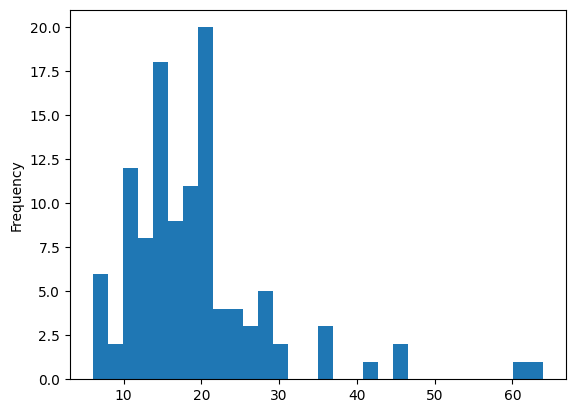

In [57]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].plot(kind='hist', bins=30)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [58]:
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].mean()

np.float64(71.94897959183673)

<Axes: ylabel='Frequency'>

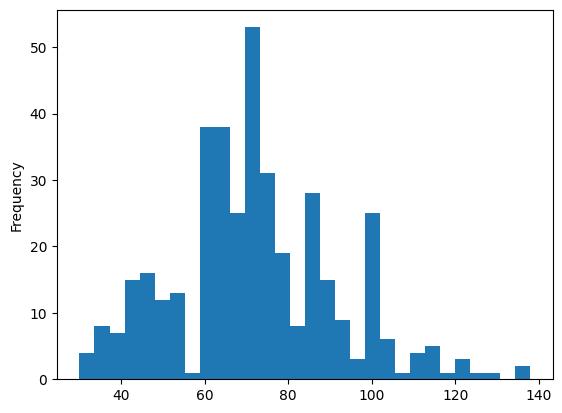

In [59]:
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].plot(kind='hist', bins=30)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: ylabel='Frequency'>

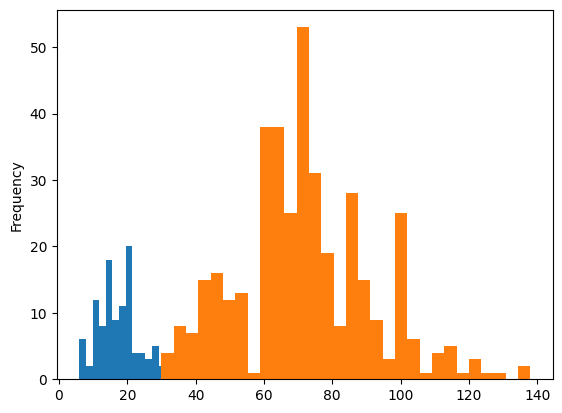

In [64]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].plot(kind='hist', bins=30)

df[df['Style'].str.contains('IPA', na=False)]['IBUs'].plot(kind='hist', bins=30)

<Axes: ylabel='Frequency'>

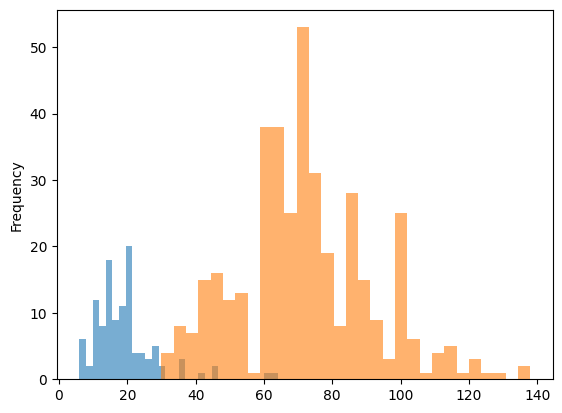

In [65]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].plot(kind='hist', bins=30, alpha=0.6, label='Wheat Beers')

df[df['Style'].str.contains('IPA', na=False)]['IBUs'].plot(kind='hist', bins=30, alpha=0.6, label='IPAs')

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [67]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['ABV'].mean()

np.float64(5.043715846994536)

In [68]:
df[df['Style'].str.contains('IPA', na=False)]['ABV'].mean()

np.float64(6.879285714285714)

<Axes: ylabel='Frequency'>

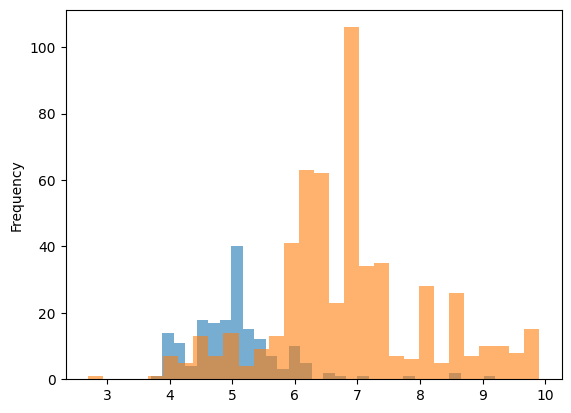

In [69]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['ABV'].plot(kind='hist', bins=30, alpha=0.6, label='Wheat Beers')

df[df['Style'].str.contains('IPA', na=False)]['ABV'].plot(kind='hist', bins=30, alpha=0.6, label='IPAs')

## Good work!